In [1]:
books = "file:///home/mayank/Books.txt"
characters = "file:///home/mayank/Characters.txt"
edges = "file:///home/mayank/Edges.txt"

In [2]:
book = sc.textFile(books)
character = sc.textFile(characters)
edge = sc.textFile(edges)

In [3]:
book.take(10)

['Vertex 6487: AA2 35',
 'Vertex 6488: M/PRM 35',
 'Vertex 6489: M/PRM 36',
 'Vertex 6490: M/PRM 37',
 'Vertex 6491: WI? 9',
 'Vertex 6492: AVF 4',
 'Vertex 6493: AVF 5',
 'Vertex 6494: H2 251',
 'Vertex 6495: H2 252',
 'Vertex 6496: COC 1']

In [4]:
character.take(10)

['Vertex 1: 24-HOUR MAN/EMMANUEL',
 'Vertex 2: 3-D MAN/CHARLES CHANDLER & HAROLD CHANDLER',
 'Vertex 3: 4-D MAN/MERCURIO',
 'Vertex 4: 8-BALL/',
 'Vertex 5: A',
 "Vertex 6: A'YIN",
 'Vertex 7: ABBOTT, JACK',
 'Vertex 8: ABCISSA',
 'Vertex 9: ABEL',
 'Vertex 10: ABOMINATION/EMIL BLONSKY']

In [5]:
edge.take(10)

['*Vertices 19428 6486',
 '1 "24-HOUR MAN/EMMANUEL"',
 '2 "3-D MAN/CHARLES CHAN"',
 '3 "4-D MAN/MERCURIO"',
 '4 "8-BALL/"',
 '5 "A"',
 '6 "A\'YIN"',
 '7 "ABBOTT, JACK"',
 '8 "ABCISSA"',
 '9 "ABEL"']

In [6]:
def edgeFilter(row):
    if '*' in row or '"' in row:
        return False
    else:
        return True
    
edgefilter = edge.filter(edgeFilter)

In [7]:
edgefilter.take(10)

['1 6487',
 '2 6488 6489 6490 6491 6492 6493 6494 6495 6496',
 '3 6497 6498 6499 6500 6501 6502 6503 6504 6505',
 '4 6506 6507 6508',
 '5 6509 6510 6511',
 '6 6512 6513 6514 6515',
 '7 6516',
 '8 6517 6518',
 '9 6519 6520',
 '10 6521 6522 6523 6524 6525 6526 6527 6528 6529 6530 6531 6532 6533 6534 6535']

Split the edge filter and make the pair rdd with key as character and value as comic

In [8]:
#Important Characters

characterBookMap = edgefilter.map(lambda x: x.split()) \
                            .map(lambda x : (x[0],x[1:]))
    
characterBookMap.take(10)

[('1', ['6487']),
 ('2',
  ['6488', '6489', '6490', '6491', '6492', '6493', '6494', '6495', '6496']),
 ('3',
  ['6497', '6498', '6499', '6500', '6501', '6502', '6503', '6504', '6505']),
 ('4', ['6506', '6507', '6508']),
 ('5', ['6509', '6510', '6511']),
 ('6', ['6512', '6513', '6514', '6515']),
 ('7', ['6516']),
 ('8', ['6517', '6518']),
 ('9', ['6519', '6520']),
 ('10',
  ['6521',
   '6522',
   '6523',
   '6524',
   '6525',
   '6526',
   '6527',
   '6528',
   '6529',
   '6530',
   '6531',
   '6532',
   '6533',
   '6534',
   '6535'])]

In [9]:
def charParse(row):
    row = row.split(":") 
    return (row[0][7:], row[1].strip())

characterLookUp = character.map(charParse).collectAsMap()

In [10]:
characterLookUp

{'1': '24-HOUR MAN/EMMANUEL',
 '2': '3-D MAN/CHARLES CHANDLER & HAROLD CHANDLER',
 '3': '4-D MAN/MERCURIO',
 '4': '8-BALL/',
 '5': 'A',
 '6': "A'YIN",
 '7': 'ABBOTT, JACK',
 '8': 'ABCISSA',
 '9': 'ABEL',
 '10': 'ABOMINATION/EMIL BLONSKY',
 '11': 'ABOMINATION | MUTANT X-VERSE',
 '12': 'ABOMINATRIX',
 '13': 'ABRAXAS',
 '14': 'ADAM 3,031',
 '15': 'ABSALOM',
 '16': 'ABSORBING MAN/CARL CRUSHER CREEL',
 '17': 'ABSORBING MAN | MUTANT X-VERSE',
 '18': 'ACBA',
 '19': 'ACHEBE, REVEREND DOCTOR MICHAEL IBN AL-HAJJ',
 '20': 'ACHILLES',
 '21': 'ACHILLES II/HELMUT',
 '22': 'ACROBAT/CARL ZANTE',
 '23': 'ADAM X',
 '24': 'ADAMS, CINDY',
 '25': 'ADAMS, CONGRESSMAN HENRY',
 '26': 'ADAMS, GEORGE',
 '27': 'ADAMS, MARTHA',
 '28': 'ADAMS, NICOLE NIKKI',
 '29': 'ADAMSON, JASON',
 '30': 'ADAMSON, REBECCA',
 '31': 'ADMIRAL PROTOCOL/',
 '32': 'ADORA',
 '33': 'ADORA CLONE',
 '34': 'ADRIA',
 '35': 'ADVA',
 '36': 'ADVENT/KYLE GROBE',
 '37': 'ADVERSARY',
 '38': 'AEGIS/TREY ROLLINS',
 '39': 'AENTAROS',
 '40': 'AFTERLI

In [12]:
#mapvalues acts only on the value part of the pair rdd
#binfing character name wid comic count
#every line can contain max 15 comic, if a character appers in more than 15 comic therefore it have more than one row here we are adding those entries
                                   
characterStrength = characterBookMap.mapValues(lambda x : len(x)) \
                                    .map(lambda x : (characterLookUp[x[0]],x[1])) \
                                    .reduceByKey(lambda x,y : x+y) \
                                    .sortBy(lambda x:-x[1])

In [13]:
characterStrength.take(10)

[('SPIDER-MAN/PETER PARKER', 1625),
 ('CAPTAIN AMERICA', 1367),
 ('IRON MAN/TONY STARK', 1168),
 ('THING/BENJAMIN J. GRIMM', 990),
 ('THOR/DR. DONALD BLAKE/SIGURD JARLSON II/JAKE OLSON/LOREN OLSON', 965),
 ('HUMAN TORCH/JOHNNY STORM', 908),
 ('MR. FANTASTIC/REED RICHARDS', 875),
 ('HULK/DR. ROBERT BRUCE BANNER', 841),
 ('WOLVERINE/LOGAN', 820),
 ('INVISIBLE WOMAN/SUE STORM RICHARDS', 782)]

#Cooccurence Network

In this we are going to map the character book map in combination of one character one book and flatten out the book value in each seperate entities and then reverses the output as (book, character) then we are collecting the character for the same key using the book as key and then will arrange the character as list for the book.

In [14]:
bookCharacterMap = characterBookMap.flatMapValues(lambda x: x) \
                                 .map(lambda x: (x[1],x[0])) \
                                 .reduceByKey(lambda x,y : x+","+y) \
                                 .mapValues(lambda x : x.split(","))

In [15]:
bookCharacterMap.take(10)

[('6490', ['2']),
 ('6493',
  ['2',
   '154',
   '859',
   '2186',
   '2399',
   '2555',
   '3035',
   '3491',
   '4228',
   '6022',
   '6148']),
 ('6496',
  ['2',
   '66',
   '133',
   '155',
   '183',
   '274',
   '403',
   '505',
   '522',
   '533',
   '545',
   '592',
   '731',
   '824',
   '859',
   '867',
   '1116',
   '1127',
   '1231',
   '1265',
   '1289',
   '1347',
   '1369',
   '1383',
   '1425',
   '1480',
   '1535',
   '1587',
   '1602',
   '1649',
   '1805',
   '2069',
   '2184',
   '2199',
   '2273',
   '2295',
   '2397',
   '2399',
   '2430',
   '2438',
   '2449',
   '2548',
   '2557',
   '2603',
   '2613',
   '2614',
   '2650',
   '2658',
   '2664',
   '2689',
   '2728',
   '2931',
   '3008',
   '3210',
   '3220',
   '3233',
   '3319',
   '3594',
   '3662',
   '3712',
   '3750',
   '3757',
   '3805',
   '3950',
   '3955',
   '3986',
   '3989',
   '4024',
   '4132',
   '4188',
   '4204',
   '4366',
   '4441',
   '4454',
   '4589',
   '4603',
   '4607',
   '4731',
   '4

from this book character map we get the relation between the characters of the marvel cinematic universe now, we are going to make pairs for those characters for making the network map

In [16]:
import itertools
cooccurrenceMap = bookCharacterMap.flatMap(lambda x: list(itertools.combinations(x[1],2)))

In [17]:
cooccurrenceMap.take(10)

[('2', '154'),
 ('2', '859'),
 ('2', '2186'),
 ('2', '2399'),
 ('2', '2555'),
 ('2', '3035'),
 ('2', '3491'),
 ('2', '4228'),
 ('2', '6022'),
 ('2', '6148')]

In [18]:
occurenceStrength = cooccurrenceMap.map(lambda x: (x,1))\
                                .reduceByKey(lambda x, y: x+y)

In [19]:
occurenceStrength.take(10)

[(('2', '859'), 3),
 (('2', '2399'), 3),
 (('2', '2555'), 3),
 (('2', '3035'), 4),
 (('154', '2186'), 2),
 (('154', '3491'), 2),
 (('154', '4228'), 41),
 (('154', '6022'), 2),
 (('154', '6148'), 406),
 (('859', '2399'), 322)]

In [20]:
cooccurenceEdges = occurenceStrength.map(lambda x : (x[0][0],x[0][1],x[1]))
cooccurenceEdges.take(10)    

[('2', '859', 3),
 ('2', '2399', 3),
 ('2', '2555', 3),
 ('2', '3035', 4),
 ('154', '2186', 2),
 ('154', '3491', 2),
 ('154', '4228', 41),
 ('154', '6022', 2),
 ('154', '6148', 406),
 ('859', '2399', 322)]

In [21]:
# Understanding and modeling the relationships between different characters
sortedCooccurence = cooccurenceEdges.sortBy(lambda x:-x[2])\
                    .map(lambda x: (characterLookUp[x[0]],characterLookUp[x[1]],x[2]))

In [22]:
sortedCooccurence.take(10)

[('HUMAN TORCH/JOHNNY STORM', 'THING/BENJAMIN J. GRIMM', 744),
 ('HUMAN TORCH/JOHNNY STORM', 'MR. FANTASTIC/REED RICHARDS', 713),
 ('MR. FANTASTIC/REED RICHARDS', 'THING/BENJAMIN J. GRIMM', 708),
 ('INVISIBLE WOMAN/SUE STORM RICHARDS', 'MR. FANTASTIC/REED RICHARDS', 701),
 ('HUMAN TORCH/JOHNNY STORM', 'INVISIBLE WOMAN/SUE STORM RICHARDS', 694),
 ('INVISIBLE WOMAN/SUE STORM RICHARDS', 'THING/BENJAMIN J. GRIMM', 668),
 ('SPIDER-MAN/PETER PARKER', 'WATSON-PARKER, MARY JANE', 616),
 ('JAMESON, J. JONAH', 'SPIDER-MAN/PETER PARKER', 526),
 ('CAPTAIN AMERICA', 'IRON MAN/TONY STARK', 446),
 ('SCARLET WITCH/WANDA MAXIMOFF', 'VISION', 422)]

In [23]:
#let's say we want to know the relationship of Spiderman with other characters 

sortedCooccurence.filter(lambda x: 'SPIDER-MAN/PETER PARKER' in x)\
                 .take(10)

[('SPIDER-MAN/PETER PARKER', 'WATSON-PARKER, MARY JANE', 616),
 ('JAMESON, J. JONAH', 'SPIDER-MAN/PETER PARKER', 526),
 ('PARKER, MAY', 'SPIDER-MAN/PETER PARKER', 380),
 ('ROBERTSON, JOE', 'SPIDER-MAN/PETER PARKER', 356),
 ('LEEDS, BETTY BRANT', 'SPIDER-MAN/PETER PARKER', 249),
 ('SPIDER-MAN/PETER PARKER', 'THOMPSON, EUGENE FLASH', 240),
 ('OSBORN, HARRY', 'SPIDER-MAN/PETER PARKER', 181),
 ('HUMAN TORCH/JOHNNY STORM', 'SPIDER-MAN/PETER PARKER', 147),
 ('CAPTAIN AMERICA', 'SPIDER-MAN/PETER PARKER', 145),
 ('OSBORN, LIZ ALLAN', 'SPIDER-MAN/PETER PARKER', 138)]

In [24]:
#make the data into range of 10 so lets divide it by 10
sortedCooccurence.map(lambda x:int(x[2]/10)).countByValue()

defaultdict(int,
            {0: 159249,
             1: 5621,
             2: 1405,
             3: 641,
             4: 375,
             5: 218,
             6: 162,
             7: 126,
             8: 82,
             9: 78,
             10: 44,
             11: 41,
             12: 45,
             13: 17,
             14: 19,
             15: 16,
             16: 11,
             17: 7,
             18: 17,
             19: 3,
             20: 9,
             21: 5,
             22: 5,
             23: 6,
             24: 7,
             25: 5,
             26: 8,
             27: 3,
             28: 2,
             29: 5,
             30: 7,
             31: 2,
             32: 1,
             33: 3,
             34: 2,
             35: 1,
             37: 2,
             38: 5,
             39: 1,
             40: 1,
             42: 1,
             44: 1,
             52: 1,
             61: 1,
             66: 1,
             69: 1,
             70: 2,
             71: 1,
  

In [25]:
import networkx as nx
G=nx.Graph()
edges = sortedCooccurence.map(lambda x:(x[0],x[1],{'weight':1000/x[2]})).take(50)

G.add_edges_from(edges)

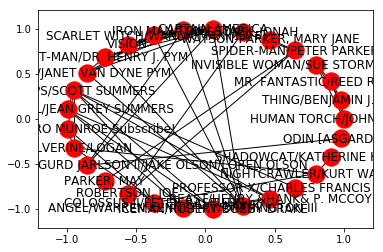

In [26]:
import matplotlib.pyplot as plt
nx.draw_networkx(G, pos=nx.circular_layout(G))
plt.show()